<a href="https://colab.research.google.com/github/aikerimbelis/googleColab/blob/main/Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df_commodities = pd.read_excel('/content/Case Study Data Analyst Raw Data.xlsx', sheet_name='Commodities')
df_frequencies = pd.read_excel('/content/Case Study Data Analyst Raw Data.xlsx', sheet_name='Frequencies',skiprows=2)

In [ ]:
# Rename columns to make them easier to work with
commodities_columns = {
    'Vendor Code': 'vendor_code',
    'Facility ID': 'facility_id',
    'Facility Name': 'facility_name',
    'Specification Number': 'specification_number',
    'Specification Name': 'specification_name',
    'Type': 'type',
    'Category': 'category',
    'Sub-Category': 'sub_category',
    'Core': 'core',
    'Risk level': 'risk_level',
    'Brand': 'brand',
    'Approved Country(-ies)': 'approved_countries',
    'Region(s)': 'regions',
    'Approved Date': 'approved_date',
    'Formulation Owner': 'formulation_owner',
    'Product Risk': 'product_risk',
    'Brand Risk': 'brand_risk',
    'FaciLowity Risk': 'facility_risk',
    'Restaurnat Risk': 'restaurant_risk'
}


In [ ]:
df_commodities = df_commodities.rename(columns=commodities_columns)

In [ ]:
df_commodities


,vendor_code,facility_id,facility_name,specification_number,specification_name,type,category,sub_category,core,risk_level,brand,approved_countries,regions,approved_date,formulation_owner,Core.1,product_risk,brand_risk,facility_risk,restaurant_risk
0,20451,64875,Facility 1835,160703.R00.V01,"BACON-APPLEWOOD SMOKED,",Food,Pork,Bacon,No,Low,Coffee,Canada,NaN,2020-04-16 18:53:15,RBI,NotCore,Low,High,Low,Low
1,06339,44881,Facility 1225,201166.R03.V01,"BACON-APPLEWOOD SMOKED,",Food,Pork,Bacon,Yes,Low,Burger,"Austria, France, Germany, Great Britain, Guade...","EMEA, LAC",2014-11-01 07:00:00,RBI,Core,Low,High,Low,Low
2,23902,44881,Facility 1225,201988.R01.V00,"BACON-APPLEWOOD SMOKED,",Food,Pork,Bacon,No,High,Coffee,Spain,EMEA,2018-07-24 12:22:10,RBI,NotCore,High,High,Low,High
3,03822,61003,Facility 1850,200024.R00.V02,"BACON-BEECHWOOD, SMOKED,",Food,Pork,Bacon,Yes,Standard,Burger,"Austria, Belgium, Denmark, Hungary, Italy, Poland",EMEA,2014-11-01 07:00:00,RBI,Core,Low,High,Low,High
4,02113,60914,Facility 1865,156666.R00.V00,"BACON-SLICED, BACK,",Food,Pork,Bacon,No,High,Burger,Great Britain,EMEA,2014-11-01 07:00:00,RBI,NotCore,High,High,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7859,KPF,14301,Facility 1502,152418.R00.V00,"KETCHUP-PACKET, HEI",Food,Condiments Bulk,Bulk Sauces,No,Low,Burger,"Colombia, El Salvador",LAC,2014-11-01 07:00:00,Supplier,NotCore,Low,High,Low,Low
7860,KPM,14304,Facility 1505,152418.R00.V00,"KETCHUP-PACKET, HEI",Food,Condiments Bulk,Bulk Sauces,No,Low,Burger,"Antigua and Barbuda, Argentina, Aruba, Bahamas...",LAC,2014-11-01 07:00:00,Supplier,NotCore,Low,High,Low,Low
7861,MU,14304,Facility 1505,154023.R01.V00,KETCHUP-BAG IN,Food,Condiments Bulk,Bulk Sauces,Yes,Low,Burger,"Antigua and Barbuda, Argentina, Aruba, Bahamas...",LAC,2014-11-01 07:00:00,Supplier,Core,Low,High,Low,Low
7862,R,44052,Facility 1207,152200.R00.V00,"CUP-COLD DRINK,",Packaging,Cups,Cold Cups,No,Standard,Burger,United States,NaN,2014-11-01 07:00:00,Supplier,NotCore,Low,High,Low,High


In [ ]:
frequencies_columns = {
    'Region': 'regions',
    'Brand': 'brand',
    'Product Type': 'product_type',
    'Product Category': 'product_category',
    'Product Subcategory': 'product_subcategory',
    'Tests per year':'Tests_per_year_core_RBI',
    'Tests per year.1':'Tests_per_year_noncore_RBI',
    'Tests per year.2':'Tests_per_year_core_supplier',
    'Tests per year.3':'Tests_per_year_noncore_supplier'
}


In [ ]:
df_frequencies = df_frequencies.rename(columns=frequencies_columns)


In [ ]:
df_frequencies

,regions,brand,product_type,product_category,product_subcategory,Tests_per_year_core_RBI,Tests_per_year_noncore_RBI,Tests_per_year_core_supplier,Tests_per_year_noncore_supplier
0,NaN,Burger,Food,Bakery,Biscuits,4,4,2,2
1,NaN,Burger,Food,Bakery,Other Muffins,4,4,2,2
2,NaN,Burger,Food,Bakery,English Muffins,4,4,2,2
3,NaN,Burger,Food,Bakery,Filled Muffin,4,4,2,2
4,NaN,Burger,Food,Bakery,Cookies,4,4,2,2
...,...,...,...,...,...,...,...,...,...
8392,LAC,Coffee,Promotional,Glasses,NaN,No Test,No Test,No Test,No Test
8393,LAC,Coffee,Promotional,Kitchenware,NaN,No Test,No Test,No Test,No Test
8394,LAC,Coffee,Promotional,Mugs,NaN,No Test,No Test,No Test,No Test
8395,LAC,Coffee,Promotional,Ornaments,NaN,No Test,No Test,No Test,No Test


In [ ]:
merged_df = pd.merge(df_commodities, df_frequencies, left_on='sub_category', right_on='product_subcategory')

In [ ]:
merged_df

,vendor_code,facility_id,facility_name,specification_number,specification_name,type,category,sub_category,core,risk_level,...,restaurant_risk,regions_y,brand_y,product_type,product_category,product_subcategory,Tests_per_year_core_RBI,Tests_per_year_noncore_RBI,Tests_per_year_core_supplier,Tests_per_year_noncore_supplier
0,20451,64875,Facility 1835,160703.R00.V01,"BACON-APPLEWOOD SMOKED,",Food,Pork,Bacon,No,Low,...,Low,NaN,Burger,Food,Pork,Bacon,12,4,4,1
1,20451,64875,Facility 1835,160703.R00.V01,"BACON-APPLEWOOD SMOKED,",Food,Pork,Bacon,No,Low,...,Low,LAC,Burger,Food,Pork,Bacon,1,1,1,No Test
2,20451,64875,Facility 1835,160703.R00.V01,"BACON-APPLEWOOD SMOKED,",Food,Pork,Bacon,No,Low,...,Low,APAC,Burger,Food,Beef,Bacon,1,1,1,No Test
3,20451,64875,Facility 1835,160703.R00.V01,"BACON-APPLEWOOD SMOKED,",Food,Pork,Bacon,No,Low,...,Low,APAC,Burger,Food,Pork,Bacon,1,1,1,No Test
4,20451,64875,Facility 1835,160703.R00.V01,"BACON-APPLEWOOD SMOKED,",Food,Pork,Bacon,No,Low,...,Low,APAC,Burger,Food,Poultry,Bacon,1,1,1,No Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519397,26013,65523,Facility 1491,164001.R01.V00,SNACK MIX-DRIED,Food,Cereals & Snacks,Snacks,No,Low,...,Low,LAC,Coffee,CIF,Cereals & Snacks,Snacks,No Test,No Test,No Test,No Test
519398,26013,65523,Facility 1491,164001.R01.V00,SNACK MIX-DRIED,Food,Cereals & Snacks,Snacks,No,Low,...,Low,LAC,Coffee,Retail Food,Cereals & Snacks,Snacks,No Test,No Test,No Test,No Test
519399,26013,65523,Facility 1491,164001.R01.V00,SNACK MIX-DRIED,Food,Cereals & Snacks,Snacks,No,Low,...,Low,LAC,Coffee,Purchasers Option,Cereals & Snacks,Snacks,No Test,No Test,No Test,No Test
519400,26013,65523,Facility 1491,164001.R01.V00,SNACK MIX-DRIED,Food,Cereals & Snacks,Snacks,No,Low,...,Low,LAC,Coffee,Raw Material,Cereals & Snacks,Snacks,No Test,No Test,No Test,No Test


In [ ]:
# Replace "No Test" values with 0 in frequency columns
cols = ['Tests_per_year_core_RBI', 'Tests_per_year_noncore_RBI', 'Tests_per_year_core_supplier', 'Tests_per_year_noncore_supplier']
merged_df[cols] = merged_df[cols].replace('No Test', 0)

In [ ]:
df_merged = merged_df

In [ ]:
risk_dict = {'Low': 0, 'High': 1}
df_merged['product_risk'] = df_merged['product_risk'].replace(risk_dict)
df_merged['brand_risk'] = df_merged['brand_risk'].replace(risk_dict)
df_merged['facility_risk'] = df_merged['facility_risk'].replace(risk_dict)
df_merged['restaurant_risk'] = df_merged['restaurant_risk'].replace(risk_dict)
df_merged['risk_level'] = df_merged['risk_level'].replace(risk_dict)

In [ ]:
risk_dict = {'Core': 0, 'NotCore': 1}
df_merged['Core.1'] = df_merged['Core.1'].replace(risk_dict)

In [ ]:
df_merged.fillna(0, inplace=True)


In [ ]:
# select only numerical columns
num_columns = merged_df.select_dtypes(include='number').columns
merged_df_num = merged_df[num_columns]

In [ ]:
# calculate correlation matrix
corr_matrix = merged_df_num.corr()

<Axes: >

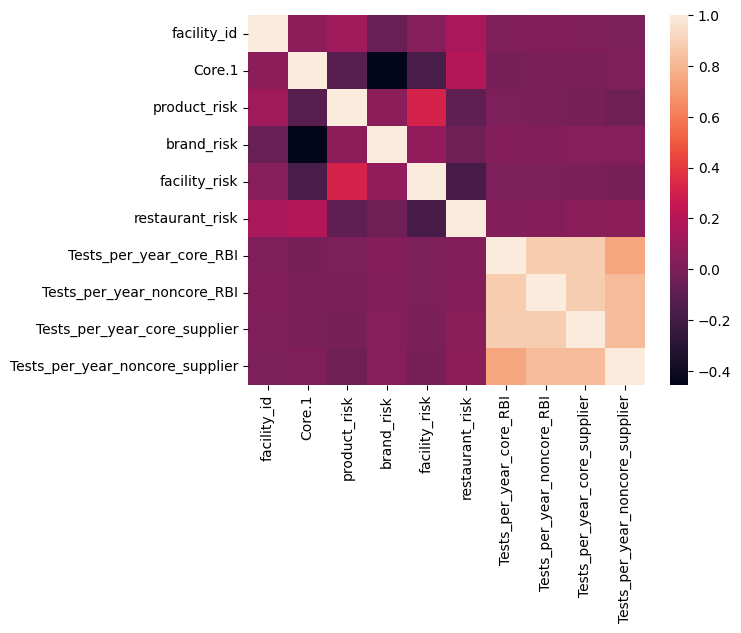

In [ ]:
sns.heatmap(corr_matrix)

In [ ]:
corr_matrix

,facility_id,Core.1,product_risk,brand_risk,facility_risk,restaurant_risk,Tests_per_year_core_RBI,Tests_per_year_noncore_RBI,Tests_per_year_core_supplier,Tests_per_year_noncore_supplier
facility_id,1.000000,0.057613,0.122057,-0.064318,0.035724,0.148186,0.015367,0.017142,0.014057,0.010145
Core.1,0.057613,1.000000,-0.118179,-0.455223,-0.171138,0.196235,-0.008758,-0.004143,0.001849,0.012552
product_risk,0.122057,-0.118179,1.000000,0.060148,0.316628,-0.096218,0.009139,-0.000735,-0.013178,-0.051525
brand_risk,-0.064318,-0.455223,0.060148,1.000000,0.078296,-0.050736,0.030360,0.027844,0.035619,0.036515
facility_risk,0.035724,-0.171138,0.316628,0.078296,1.000000,-0.179193,0.009444,0.009230,-0.000582,-0.009055
restaurant_risk,0.148186,0.196235,-0.096218,-0.050736,-0.179193,1.000000,0.022815,0.027997,0.045244,0.061644
Tests_per_year_core_RBI,0.015367,-0.008758,0.009139,0.030360,0.009444,0.022815,1.000000,0.878517,0.881392,0.739804
Tests_per_year_noncore_RBI,0.017142,-0.004143,-0.000735,0.027844,0.009230,0.027997,0.878517,1.000000,0.880869,0.821087
Tests_per_year_core_supplier,0.014057,0.001849,-0.013178,0.035619,-0.000582,0.045244,0.881392,0.880869,1.000000,0.819246
Tests_per_year_noncore_supplier,0.010145,0.012552,-0.051525,0.036515,-0.009055,0.061644,0.739804,0.821087,0.819246,1.000000


In [ ]:
# find factors with higher correlation to testing frequencies
corr_to_testing = corr_matrix['Tests_per_year_core_RBI'].abs().sort_values(ascending=False)
print("Factors with higher correlation to testing frequencies:\n", corr_to_testing[1:])

Factors with higher correlation to testing frequencies:
 Tests_per_year_core_supplier       0.881392
Tests_per_year_noncore_RBI         0.878517
Tests_per_year_noncore_supplier    0.739804
brand_risk                         0.030360
restaurant_risk                    0.022815
facility_id                        0.015367
facility_risk                      0.009444
product_risk                       0.009139
Core.1                             0.008758
Name: Tests_per_year_core_RBI, dtype: float64


In [ ]:
merged_df_RBI = merged_df[['product_risk','brand_risk','facility_risk','restaurant_risk','Tests_per_year_core_RBI']]

In [ ]:
# select only numerical columns
num_columns = merged_df_RBI.select_dtypes(include='number').columns
merged_df_num = merged_df_RBI[num_columns]

In [ ]:
# calculate correlation matrix
corr_matrix_RBI = merged_df_num.corr()

In [ ]:
corr_matrix_RBI

,product_risk,brand_risk,facility_risk,restaurant_risk,Tests_per_year_core_RBI
product_risk,1.000000,0.060148,0.316628,-0.096218,0.009139
brand_risk,0.060148,1.000000,0.078296,-0.050736,0.030360
facility_risk,0.316628,0.078296,1.000000,-0.179193,0.009444
restaurant_risk,-0.096218,-0.050736,-0.179193,1.000000,0.022815
Tests_per_year_core_RBI,0.009139,0.030360,0.009444,0.022815,1.000000


In [ ]:
# find factors with higher correlation to testing frequencies
corr_to_testing = corr_matrix_RBI['Tests_per_year_core_RBI'].abs().sort_values(ascending=False)
print("Factors with higher correlation to testing frequencies:\n", corr_to_testing[1:])

Factors with higher correlation to testing frequencies:
 brand_risk         0.030360
restaurant_risk    0.022815
facility_risk      0.009444
product_risk       0.009139
Name: Tests_per_year_core_RBI, dtype: float64


In [ ]:
# perform PCA to identify how many factors are needed to explain 80% of the variability
# first, standardize the data
scaler = StandardScaler()
merged_df_num_std = scaler.fit_transform(merged_df_num)

In [ ]:
merged_df_num_std

array([[-0.82130361,  1.16885443, -0.70986232, -0.61727494, 11.33248551],
       [-0.82130361,  1.16885443, -0.70986232, -0.61727494,  0.6408836 ],
       [-0.82130361,  1.16885443, -0.70986232, -0.61727494,  0.6408836 ],
       ...,
       [-0.82130361, -0.85553853,  1.40872387, -0.61727494, -0.33108021],
       [-0.82130361, -0.85553853,  1.40872387, -0.61727494, -0.33108021],
       [-0.82130361, -0.85553853,  1.40872387, -0.61727494, -0.33108021]])

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# create an imputer object with the mean strategy
imputer = SimpleImputer(strategy='mean')

In [ ]:
# impute missing values in merged_df_num_std
merged_df_num_std_imputed = imputer.fit_transform(merged_df_num_std)

In [ ]:
# fit the standardized data to PCA
pca = PCA()
pca.fit(merged_df_num_std_imputed)

PCA()

In [ ]:
# get the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
# identify how many factors are needed to explain 80% of the variability
variance_ratio_cumsum = explained_variance_ratio.cumsum()
num_factors = (variance_ratio_cumsum <= 0.8).sum() + 1
print("Number of factors needed to explain 80% of the variability:", num_factors)

Number of factors needed to explain 80% of the variability: 4


In [ ]:
# identify the factors that explain 80% of the variability
first_80_percent = variance_ratio_cumsum[num_factors - 1]
print("Variance explained by the first", num_factors, "factors:", first_80_percent)

Variance explained by the first 4 factors: 0.8659267209253889


In [ ]:
print("Factors that explain 80% of the variability:\n", pd.Series(pca.components_[0:num_factors].T[:,0], index=num_columns).abs().sort_values(ascending=False))

Factors that explain 80% of the variability:
 facility_risk              0.642997
product_risk               0.590913
restaurant_risk            0.419975
brand_risk                 0.246050
Tests_per_year_core_RBI    0.021359
dtype: float64


In [ ]:
# identify which factors are more redundant
loadings = pd.DataFrame(pca.components_, columns=num_columns, index=['PC{}'.format(i+1) for i in range(len(num_columns))]).T
loadings['sum_of_squares'] = loadings.pow(2).sum(axis=1)
print("Loadings of each factor:\n", loadings)

Loadings of each factor:
                               PC1       PC2       PC3       PC4       PC5  \
product_risk             0.590913 -0.012535  0.292673 -0.391664 -0.641565   
brand_risk               0.246050  0.462133 -0.822994 -0.219070 -0.024105   
facility_risk            0.642997 -0.043400  0.174349 -0.105448  0.736990   
restaurant_risk         -0.419975  0.230160  0.216881 -0.824134  0.210743   
Tests_per_year_core_RBI  0.021359  0.855230  0.399485  0.329076 -0.015693   

                         sum_of_squares  
product_risk                        1.0  
brand_risk                          1.0  
facility_risk                       1.0  
restaurant_risk                     1.0  
Tests_per_year_core_RBI             1.0  


In [ ]:
# Based on the correlation analysis, we can see that "brand_risk" and "restaurant_risk" have a higher correlation.

# We also performed PCA to identify how many factors are needed to explain 80% of the variability. The analysis revealed that 4 factors explain 86.6% of the variance in the data. The top three factors were "facility_risk," "product_risk," and "restaurant_risk." The fourth factor was "brand_risk." These factors may be useful in identifying the key drivers of testing frequencies and predicting future testing frequencies.

# redundant factor : 
# In the code provided, we can see the loadings of each factor in the loadings dataframe. The sum_of_squares column represents the total variance explained by each factor.

# Based on the loadings, we can see that the variables product_risk, brand_risk, and facility_risk have high loadings on the first factor (PC1), while restaurant_risk has a high loading on the second factor (PC2). This suggests that the variables product_risk, brand_risk, and facility_risk are strongly associated with each other and may be redundant, while restaurant_risk is less strongly associated with these variables and may be less redundant.